# Random Forest Regresión

# Datos


El set de datos Boston disponible en la librería scikitlearn contiene precios de viviendas de la ciudad de Boston, así como información socio-económica del barrio en el que se encuentran. Se pretende ajustar un modelo de regresión que permita predecir el precio medio de una vivienda ( MEDV ) en función de las variables disponibles.



In [63]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

In [64]:
datos = pd.read_csv("Boston.csv", sep=",")
datos.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Ajuste Del Modelo

Se ajusta un modelo empleando como variable respuesta MEDV y como predictores todas las otras variables disponibles.  
La clase RandomForestRegressor del módulo sklearn.ensemble permite entrenar modelos random forest para prpblemas de regresión. Los parámetros e hiperparámetros empleados por defecto son:  
* n_estimators=100.  
* criterion='mse'.  
* max_depth=None.  
* min_samples_split=2.  
* min_samples_leaf=1.  
* min_weight_fraction_leaf=0.0.  
* max_features='auto'.  
* max_leaf_nodes=None.  
* min_impurity_decrease=0.0.  
* min_impurity_split=None.  
* bootstrap=True.  
* oob_score=False.  
* n_jobs=None.  
* random_state=None.  
* verbose=0.  
* warm_start=False.  
* ccp_alpha=0.0.  
* max_samples=None.  
  
De entre todos ellos, destacan aquellos que detienen el crecimiento de los árboles, los que controlan el número de árboles y predictores incluidos, y los que gestionan la paralelización:  

* n_estimators ; número de árboles incluidos en el modelo.
* max_depth : profundidad máxima que pueden alcanzar los árboles.
* min_samples_split : número mínimo de observaciones que debe de tener un nodo para que pueda divid decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split).  
* min_samples_leaf : número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).  
* max_leaf_nodes : número máximo de nodos terminales que pueden tener los árboles.
* max_features : número de predictores considerados a en cada división. 
* oob_score : Si se calcula o no el out-of-bag R^2. Por defecto es False ya que aumenta el tiempo de entrenamiento.
* n_jobs : número de cores empleados para el entrenamiento. En random forest los árboles se ajustan de forma independiente, por lo la paralelización reduce notablemente el tiempo de entrenamiento. Con -1 se utilizan todos los cores disponibles.
* random_state : semilla para que los resultados sean reproducibles. Tiene que ser un valor entero.  


Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.  


## División de los datos en train y test

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    datos.drop(columns = "MEDV"),
    datos['MEDV'],
    random_state = 123)

## Creación Del Modelo

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
modelo = RandomForestRegressor(n_estimators = 10,
                               criterion = 'squared_error',
                               max_depth = None,
                               max_features = 'auto',
                               oob_score = False,
                               n_jobs = -1,
                               random_state = 123)

## Entrenamiento Del Modelo

In [69]:
modelo.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=123)

## Predicción Y Evaluación del modelo

Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X = X_test)
rmse = mean_squared_error(y_true = y_test,
                          y_pred = predicciones,
                          squared = False)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 4.358493834335092


## Optimización De Hiperparámetros

El modelo inicial se ha entrenado utilizando 10 árboles ( n_estimators=10 ) y manteniendo el resto de hiperparámetros con su valor por defecto. Al ser hiperparámetros, no se puede saber de antemano cuál es el valor más adecuado, la forma de identificarlos es mediante el uso de estrategias de validación, por ejemplo validación cruzada.  
  
Los modelos Random Forest tienen la ventaja de disponer del Out-of-Bag error, lo que permite obtener una estimación del error de test sin recurrir a la validación cruzada, que es computacionalmente costosa. En la implementación de RandomForestRegressor , la métrica
devuelta como oob_score es el , si se desea otra, se tiene que recurrir al método oob_decision_function_() para obtener las predicciones y con ellas calcular la métrica de interés. Para una explicación más detallada consultar: Grid search de modelos Random Forest con out-of-bag error y early stopping.  
  
Cabe tener en cuenta que, cuando se busca el valor óptimo de un hiperparámetro con dos métricas distintas, el resultado obtenido raramente es el mismo. Lo importante es que ambas métricas identifiquen las mismas regiones de interés.  
  
Cabe tener en cuenta que, cuando se busca el valor óptimo de un hiperparámetro con dos métricas distintas, el resultado obtenido raramente es el mismo. Lo importante es que ambas métricas identifiquen las mismas regiones de interés.

### Número de árboles
En Random Forest, el número de árboles no es un hiperparámetro crítico en cuanto que, añadir árboles, solo puede hacer que mejorar el resultado. En Random Forest no se produce overfitting por exceso de árboles. Sin embargo, añadir árboles una vez que la mejora se estabiliza es una perdida te recursos computacionales.

In [72]:
import matplotlib.pyplot as plt

D:\Documentos\Programas\Miniconda3\envs\Entorno01\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Documentos\Programas\Miniconda3\envs\Entorno01\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Documentos\Programas\Miniconda3\envs\Entorno01\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Valor óptimo de n_estimators: 56


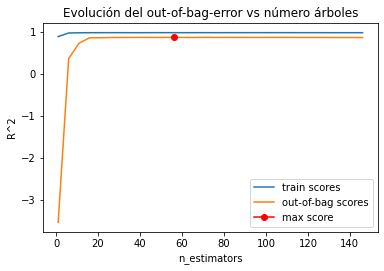

In [73]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.

for n_estimators in estimator_range:
    modelo = RandomForestRegressor(n_estimators = n_estimators, 
                                   criterion = 'squared_error', 
                                   max_depth = None, 
                                   max_features = 'auto',
                                   oob_score = True,
                                   n_jobs = -1,
                                   random_state = 123)
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

In [74]:
from sklearn.model_selection import cross_val_score

Valor óptimo de n_estimators: 26


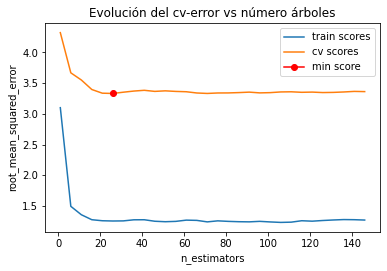

In [75]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(n_estimators = n_estimators,
                                   criterion = 'squared_error',
                                   max_depth = None,
                                   max_features = 'auto',
                                   oob_score = False,
                                   n_jobs = -1,
                                   random_state = 123)
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(y_true = y_train,
                              y_pred = predicciones,
                              squared = False)
    train_scores.append(rmse)
    # Error de validación cruzada
    scores = cross_val_score(estimator = modelo,
                             X = X_train,
                             y = y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5)
    
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())



# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Ambas métricas indican que, a partir de entre 20 y 60 árboles, el error de validación del modelo se estabiliza.

### Max Features
El valor de máx_features es uno de los hiperparámetros más importantes de random forest, ya que es el que permite controlar cuánto se decorrelacionan los árboles entre sí.

Valor óptimo de max_features: 5


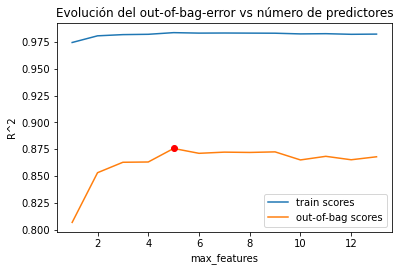

In [76]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(n_estimators = 100,
                                   criterion = 'squared_error',
                                   max_depth = None,
                                   max_features = max_features,
                                   oob_score = True,
                                   n_jobs = -1,
                                   random_state = 123)
    
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)


# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

Valor óptimo de max_features: 9


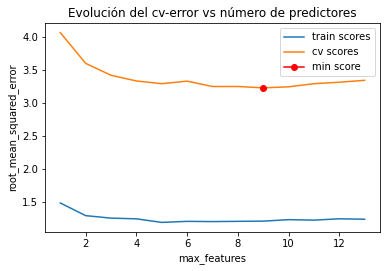

In [77]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    modelo = RandomForestRegressor(n_estimators = 100, 
                                   criterion = 'squared_error',
                                   max_depth = None,
                                   max_features = max_features,
                                   oob_score = True,
                                   n_jobs = -1,
                                   random_state = 123)
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(y_true = y_train,
                              y_pred = predicciones,
                              squared = False)
    train_scores.append(rmse)
    # Error de validación cruzada
    scores = cross_val_score(estimator = modelo, 
                             X = X_train,
                             y = y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5)
    
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())


# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

Acorde a las dos métricas utilizadas, el valor óptimo de max_features está entre 5 y 9.

### Grid Search
Aunque el análisis individual de los hiperparámetros es útil para entender su impacto en el modelo e identificar rangos de interés, la búsqueda final no debe hacerse de forma secuencial, ya que cada hiperparámetro interacciona con los demás. Es preferible recurrir a grid search o random search para analizar varias combinaciones de hiperparámetros.   
  
### Grid Search basado en out-of-bag error

In [78]:
from sklearn.model_selection import ParameterGrid

In [79]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
    {'n_estimators': [150],
    'max_features': [5, 7, 9],
    'max_depth' : [None, 3, 10, 20]
    })

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    modelo = RandomForestRegressor(oob_score = True,
                                   n_jobs = -1,
                                   random_state = 123,
                                   ** params)
    
    modelo.fit(X_train, y_train)
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

    
# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 9, 'n_estimators': 150} ✓


,oob_r2,max_depth,max_features,n_estimators
9,0.876112,20.0,5.0,150.0
0,0.876026,NaN,5.0,150.0
2,0.873244,NaN,9.0,150.0
11,0.872855,20.0,9.0,150.0


In [80]:
import multiprocessing

In [81]:
# # VERSIÓN PARALELIZADA
# # ==============================================================================
# # Grid de hiperparámetros evaluados
# # ==============================================================================
# param_grid = ParameterGrid(
#     {'n_estimators': [150],
#      'max_features': [5, 7, 9],
#      'max_depth' : [None, 3, 10, 20]
#     })


# # Loop paralelizado para ajustar un modelo con cada combinación de hiperparámetros
# # ==============================================================================

# def eval_oob_error(X, y, modelo, params, verbose=True):
#     """
#     Función para entrenar un modelo utilizando unos parámetros determinados
#     y que devuelve el out-of-bag error
#     """
#     modelo.set_params(oob_score = True,
#                       n_jobs = -1,
#                       random_state = 123,
#                       ** params)
    
#     modelo.fit(X, y)
    
#     if verbose:
#         print(f"Modelo: {params} \u2713")
    
#     return{'params': params, 'oob_r2': modelo.oob_score_}


# n_jobs = multiprocessing.cpu_count(-1)
# pool = multiprocessing.Pool(processes=n_jobs)
# resultados = pool.starmap(eval_oob_error,
#                           [(X_train, y_train, RandomForestRegressor(), params) for params in param_grid]
#                          )

# # Resultados
# # ==============================================================================
# resultados = pd.DataFrame(resultados)
# resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
# resultados = resultados.drop(columns = 'params')
# resultados = resultados.sort_values('oob_r2', ascending=False)
# resultados.head(4)

In [82]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-r2)")
print("--------------------------------------------")
print(resultados.iloc[0,0], ":", resultados.iloc[0,:]['oob_r2'], "R2")

--------------------------------------------
Mejores hiperparámetros encontrados (oob-r2)
--------------------------------------------
0.8761119758435352 : 0.8761119758435352 R2


### Grid Search basado en validación cruzada

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [84]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth' : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================

grid = GridSearchCV(estimator = RandomForestRegressor(random_state = 123),
                    param_grid = param_grid,
                    scoring = 'neg_root_mean_squared_error',
                    n_jobs = multiprocessing.cpu_count() - 1,
                    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123),
                    refit = True,
                    verbose = 0,
                    return_train_score = True
                   )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
.drop(columns = 'params') \
.sort_values('mean_test_score', ascending = False) \
.head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
0,None,5,150,-3.322814,0.694243,-1.262209,0.070334
9,20,5,150,-3.323318,0.696368,-1.262743,0.070427
6,10,5,150,-3.342392,0.694921,-1.332379,0.065084
7,10,7,150,-3.344898,0.732418,-1.329324,0.066658


In [85]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': None, 'max_features': 5, 'n_estimators': 150} : -3.322814334216982 neg_root_mean_squared_error


Una vez identificados los mejores hiperparámetros, se reentrena el modelo indicando los valores óptimos en sus argumentos. Si en el GridSearchCV() se indica refit=True , este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_ .

In [86]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo.predict(X = X_test)
rmse = mean_squared_error(y_true = y_test, 
                          y_pred = predicciones,
                          squared = False
                         )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 3.741488503787231


Tras optimizar los hiperparámetros, se consigue reducir el error rmse del modelo de 4.35 a 3.74. Las predicciones del modelo final se alejan en promedio 3.74 unidades (3740 dólares) del valor real.

## Importancia De Predictores


### Importancia Por Pureza De Nodos

In [87]:
importancia_predictores = pd.DataFrame(
    {'predictor': datos.drop(columns = "MEDV").columns,
     'importancia': modelo.feature_importances_}
)

print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,RM,0.438703
12,LSTAT,0.352933
7,DIS,0.051219
0,CRIM,0.040944
4,NOX,0.035128
10,PTRATIO,0.022411
6,AGE,0.017649
9,TAX,0.015948
11,B,0.010508
2,INDUS,0.007349


### Importancia Por Permutación

In [88]:
from sklearn.inspection import permutation_importance

In [89]:
importancia = permutation_importance(estimator = modelo_final,
                                     X = X_train,
                                     y = y_train,
                                     n_repeats = 5,
                                     scoring = 'neg_root_mean_squared_error',
                                     n_jobs = multiprocessing.cpu_count() - 1,
                                     random_state = 123
                                    )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
)

df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
12,4.908552,0.212955,LSTAT
5,4.797233,0.059018,RM
4,1.357376,0.079530,NOX
7,1.253063,0.059919,DIS
10,0.945869,0.056614,PTRATIO
0,0.770452,0.035104,CRIM
9,0.505306,0.015649,TAX
6,0.445013,0.021697,AGE
2,0.441031,0.030156,INDUS
11,0.324039,0.009679,B


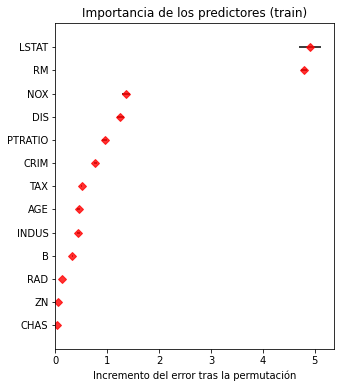

In [90]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(df_importancia['feature'],
        df_importancia['importances_mean'],
        xerr=df_importancia['importances_std'],
        align='center',
        alpha=0)

ax.plot(df_importancia['importances_mean'],
        df_importancia['feature'],
        marker="D",
        linestyle="",
        alpha=0.8,
        color="r")

ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

Ambas estrategias identifican LSTAT y RM como los predictores más influyentes, acorde a los datos de entrenamiento.